# Multiprocessing Demonstration

![multiprocessing](multiprocessing.jpg)

### Learning Objectives:
* Global Interpreter Lock (GIL)
* What is multiprocessing?
* Speed comparison 
* Runtime analysis
* Multiprocessing vs Threading
* Extending to other technologies

### Global Interpreter Lock (GIL)

Global interpreter lock (GIL) is a mechanism used in computer language interpreters to synchronize the execution of threads so that only one native thread can execute at a time. (https://en.wikipedia.org/wiki/Global_interpreter_lock)

* **In other words, CPython only runs one thread at a time**
* This avoids compromising shared/global data structures
* To get parallelization in python, we must run multiple jobs as separate processes


### What is multiprocessing?

In [1]:
%%bash 
brew install htop # installing htop

In [18]:
import time
def how_to_fry_eggs_on_my_computer(t):
    '''
    INPUT: INT/FLOAT - time (seconds) to waste electricity
    OUTPUT: None
    '''
    start = time.time()
    while time.time() - start < t:
        pass
    return 'One process completed'

This is serial processing.  Try running this and monitor `htop` for the activities of your different cores

In [3]:
how_to_fry_eggs_on_my_computer(10)

'One process completed'

Observations
* What did you observe?
* How many python processes were running?
* Why did two cores show activity?

Now let's try the same task but in parallel.  A lifecycle of a process is:

* Fork
* Execute 
* Exit
* Reaped by parent

In [4]:
from multiprocessing import Pool, cpu_count

n_cpus = cpu_count()
pool = Pool(processes=n_cpus)

print('This machine has {} cpu\'s'.format(n_cpus))

This machine has 4 cpu's


In [5]:
import numpy as np

pool.map(how_to_fry_eggs_on_my_computer, np.ones(n_cpus)*10)

['One process completed',
 'One process completed',
 'One process completed',
 'One process completed']

### Speed Comparison

In [19]:
def count_prime(n):
    '''
    INPUT: INT - positive number to calculate primes
    OUTPUT: INT - number of prime numbers in digits up to n
    '''
    counter = 0
    for i in range(2, n-1):
        if n % i == 0:
            counter += 1
    return counter

numbers = [int(i) for i in [7.4E7, 7.3E7, 7.1E7, 7.7E7]]
start = time.time()
prime_count = [count_prime(n) for n in numbers]
print('Computation taken {} seconds with serial processing and returned {}'.format(time.time()-start, prime_count))

Computation taken 33.24370884895325 seconds with serial processing and returned [110, 96, 96, 194]


In [20]:
pool = Pool(processes=n_cpus)
start = time.time()
prime_count = pool.map(count_prime, numbers)
print('Computation taken {} seconds with multiprocessing and returned {}'.format(time.time()-start, prime_count))

Computation taken 21.188700199127197 seconds with multiprocessing and returned [110, 96, 96, 194]


In [15]:
def speed_comparison(n_processes):
    '''
    INPUT: n_processes to perform `count_prime`
    OUTPUT: time (in seconds) the computation took
    '''
    pool = Pool(processes=n_processes)
    numbers = list(range(20000, 40000))
    start = time.time()
    prime_count = pool.map(count_prime, numbers)
    return time.time()-start

processes = list(range(1, 20))
time = [speed_comparison(n_processes) for n_processes in processes]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

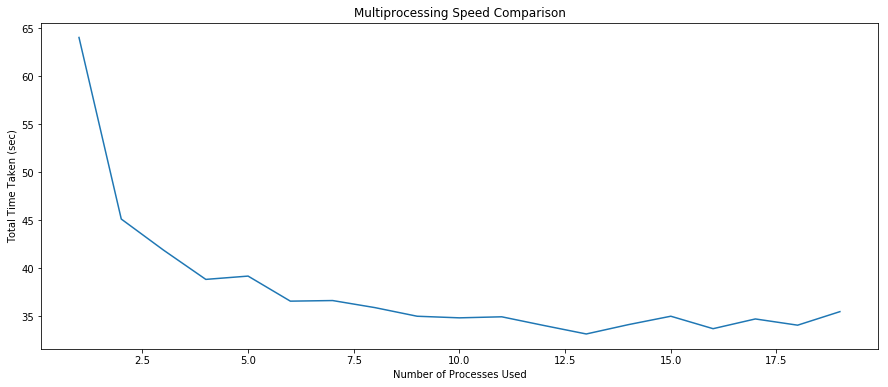

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(processes, time)
plt.xlabel('Number of Processes Used')
plt.ylabel('Total Time Taken (sec)')
plt.title('Multiprocessing Speed Comparison')


![amdahls_law](images/amdahlslaw.png)

**Amdahl's Law** 

* Offers a theoretical framework for understanding the speed improvement of parallel processing
* In brief, the speed-up is always limited by the part of the task that cannot be benefit from the improvement

### Runtime Analysis (aka Big O Notation)

In [ ]:
def has_element(lst, element):
    for elem in lst:
        if elem == element:
            return True
    return False

* How long does this code take to run?
* What is it runtime a function of?

Big O Notation Overview

* The runtime for the above code is O(n)
* Runtime refers to the worst case scenerio
* Pronounced "Big oh of n"
* This is a crude calculation 
 - Ignore constant factors
 - If there are multiple elements of the calculation, only look at teh most complex

**What does this actually matter?**  For trival tasks, you'll hardly notice a difference in different algorithms.  As N increases, however, runtime becomes increasingly important

|n | O(n) algorithm | O(n^2) algorithm|
|----|-----|------|
|100 | 1 sec | 1 sec|
|1000 | 10 sec | 100 sec|
|10,000 | 100 sec | 10,000 sec = 167 min|
|100,000 | 1000 sec = 17 min | 1,000,000 sec = 11 days|

![comparison](images/comparison.png)

Here are the runtimes you will commonly see, in order from slow to fast:

* O(1) (constant)
* O(log n) (logarithmic)
* O(n) (linear)
* O(n log n)
* O(n^2) (quadratic)
* O(n^3) (cubic)
* O(2^n) (exponential) (there are different levels of exponential depending on the base)

Here are some standard operations and their operations:

* List operations:
 - Appending: O(1)
 - Adding to the beginning or middle: O(n) (have to slide everything over!)
 - Popping from the end: O(1)
 - Popping from the beginning or middle: O(n)
 - Looking up by index: O(1)
 - Checking membership (seaching): O(n) (have to look at every item)
 - Searching if the list is in sorted order: O(log n) (binary search)
* Dictionary operations (Dictionaries are fast!!):
 - Inserting an item: O(1)
 - Removing an item: O(1)
 - Looking up by key: O(1)
 - Looking up by value: O(n) (have to look at every item)
* Sorting:
 - O(n log n)

### Multiprocessing vs Threading

**The rule of thumb is that if a task takes long enough for you to ask the question "should I use multiprocessing?" then you should likely consider it**

Commit this to memory and you should always be able to pick the best tool:

|Approach |Context |Memory Space | Example Use Case | 
|:-----:|:-----:|:-----:|:-----:|:-----:|
|Threading | I/O bound | Shared | Webscraping (where you're waiting on GET requests) | 
|Multiprocessing | CPU bound | Separate |  Gridsearch (where you're limited by the computation) | 

### Extending to other technologies

|Tool |Distribute term|Consolidate term|Application|
|:--------:|:--------:|:--------:|:--------:|
| multiprocessing | `start` | `join` |Distributing work across processors|
| threading | `run`/`start` | `join` |Running work concurrently with shared memory and less overhead |
| ipyparallel | `scatter` (data) `map` (work) | `gather` |Distributing work across processors or nodes|
| Hadoop | map | reduce|Distributing work across nodes|
| Spark | many | many | Adds complexity to Hadoop through an understanding of DAG |

### Concluding Remarks

* Use parallel processing with computationally intensive jobs
* Use threading for speed
* Use a parallel processing when the length of the job offsets the cost of launching a process
* Like always, make a minimum viable product and then scale.  
  * In this case, that means code in serial first before parallelizing  
  * "Premature optimization is the root of all evil"
* Have fun debugging :-)

### Other Resources

* https://wiki.python.org/moin/TimeComplexity
* http://www.greenteapress.com/compmod/html/thinkcomplexity004.html
* https://en.wikipedia.org/wiki/Big_O_notation#Formal_definition